<a href="https://colab.research.google.com/github/Raushan787/IPR/blob/main/Gas_Well_IPR_using_Prssure_sq_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [35]:
#Data taken from Tarek Ahmed Example-8-3
Pr=1952 #psia initial prssure of reservoir
Pr_f=1700  #psia prssure of reservoir after depletion
Pwf_i=np.array([1700,1500,1300]) #psia
Qg=np.array([2624.6,4154.7,5425.1]) #Mscf/day

ug_z=0.01206 # at 1952 psia
ug_z_f=0.01180 #at 1700 psia

**Detail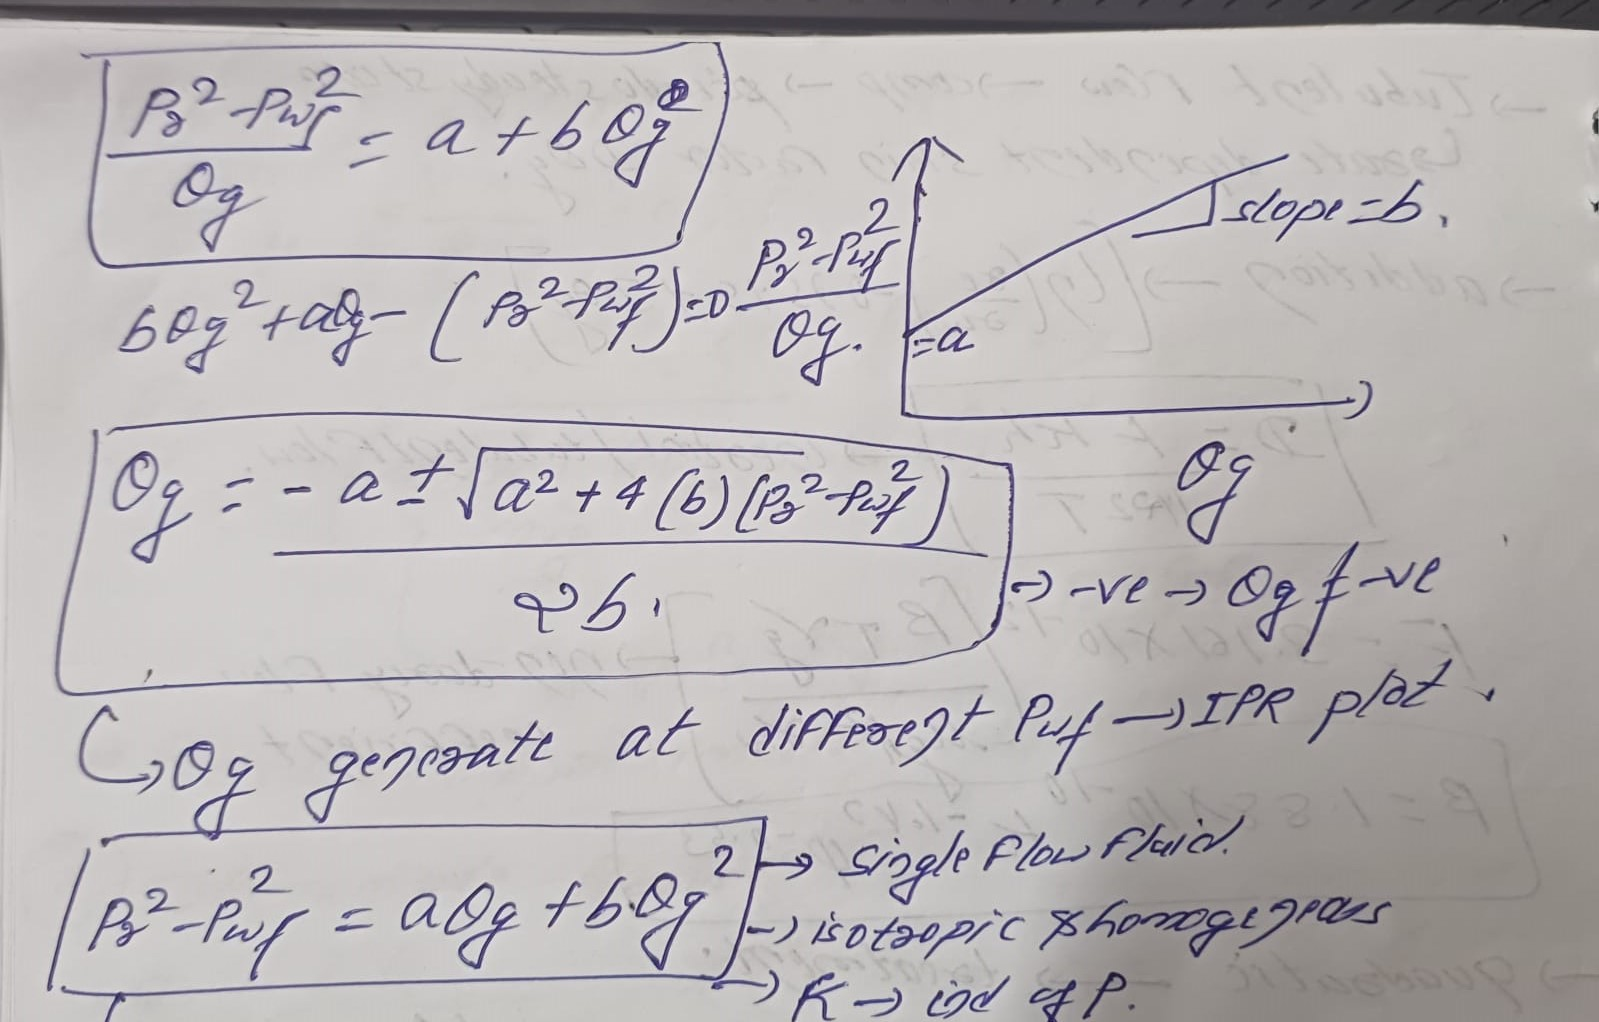**

In [36]:
#Calculating (Pr**2 - Pwf**2)/Qg
result=((Pr**2)-(Pwf_i**2))/Qg
result


array([350.64543168, 375.55154403, 390.83224272])

In [37]:
#Creating dataframe
df=pd.DataFrame({"Pwf":Pwf_i,"Qg":Qg,"(Pr**2-Pwf**2)/Qg":result})
df

,Pwf,Qg,(Pr**2-Pwf**2)/Qg
0,1700,2624.6,350.645432
1,1500,4154.7,375.551544
2,1300,5425.1,390.832243


**Performing Linear Regression**

In [38]:
linear_reg=LinearRegression()
linear_reg.fit(df[["Qg"]],df[["(Pr**2-Pwf**2)/Qg"]])

LinearRegression()

For Slope Calculation

In [39]:
b=linear_reg.coef_
b

array([[0.01441479]])

For intercept Calculation

In [51]:
a=linear_reg.intercept_
a

array([313.70177398])

In [52]:
#Create array of Pwf
Pwf=np.arange(Pr,-1,-1)

In [54]:
#Generating IPR curve for initial reservoir pressure
Qg=(-a+ np.sqrt(a**2+4*b*(Pr**2-Pwf**2)))/(2*b)

AOF=(-a+np.sqrt(a**2+4*b*(Pr**2)))/(2*b)
Qg

array([[   0.        ,   12.43464813,   24.84875789, ..., 8682.34676733,
        8682.35208638, 8682.35385939]])

In [55]:
AOF

array([[8682.35385939]])

**Conversion 2-D array into 1-D array**

flatten() always returns a copy of the array, while ravel() may return a view or a copy depending on the array's memory layout.

In [59]:
#Since Qg and AOF is 2-D array so convert into 1D
Qg=Qg.flatten()
AOF=AOF.flatten()

**Future IPR**

Assuming reservoir pressure depleted to 1700 psi

In [60]:
#Calculating of a and b constant after reservoir pressure depletion 1700
Pwf_f=np.arange(1700,-1,-1)
a_f=a*(ug_z_f/ug_z)
b_f=b*(ug_z_f/ug_z)
a_f,b_f

(array([306.93871749]), array([[0.01410403]]))

In [61]:
#Generating IPR curve for depleted reservoir pressure
Qg_f=(-a_f+ np.sqrt(a_f**2+4*b_f*(Pr_f**2-Pwf_f**2)))/(2*b_f)

AOF_f=(-a_f+np.sqrt(a_f**2+4*b_f*(Pr_f**2)))/(2*b_f)
Qg_f

array([[   0.        ,   11.06824255,   22.11874675, ..., 7099.50149129,
        7099.50740609, 7099.50937769]])

In [63]:
Qg_f=Qg_f.ravel()
AOF_f=AOF_f.ravel()

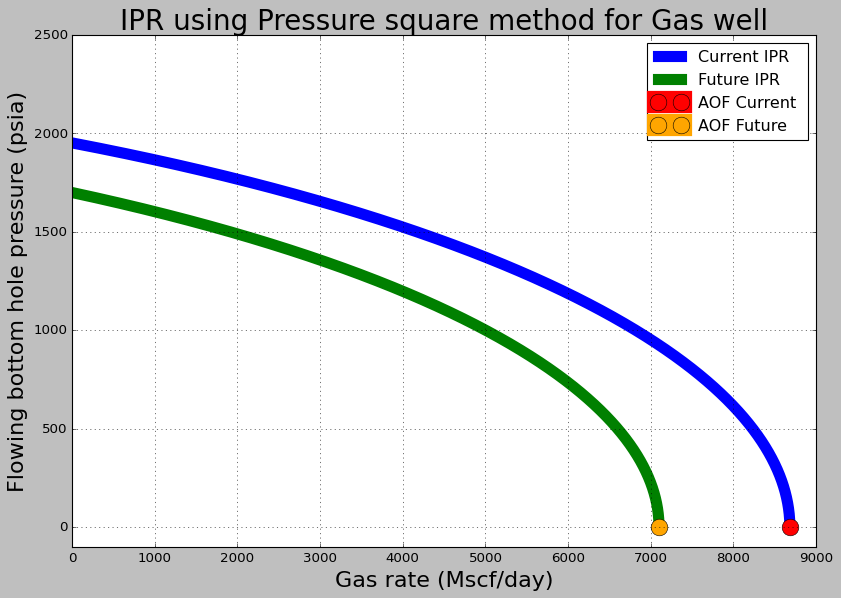

In [69]:
#Create plot
plt.figure(figsize=(12,8))
plt.style.use("classic")
plt.plot(Qg,Pwf,label="Current IPR",lw="10")
plt.plot(Qg_f,Pwf_f,label="Future IPR",lw="10")
plt.plot(AOF,0,label="AOF Current ",marker="o",markersize=15,c="red",lw=20)
plt.plot(AOF_f,0,label="AOF Future ",marker="o",markersize=15,c="orange",lw=20)
plt.ylim(-100,2500)
plt.ylabel("Flowing bottom hole pressure (psia)",size=20)
plt.xlabel("Gas rate (Mscf/day)",size=20)
plt.title("IPR using Pressure square method for Gas well",size=25)
plt.legend(loc="best")
plt.grid()
plt.show()